In [3]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdulwadood11220/netflix-customer-churn-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\rshew\.cache\kagglehub\datasets\abdulwadood11220\netflix-customer-churn-dataset\versions\1


In [10]:
import os
# List files in the downloaded dataset directory
files = os.listdir(path)
files


['netflix_customer_churn.csv']

In [15]:
import pandas as pd
# Load the dataset
df = pd.read_csv(os.path.join(path, 'netflix_customer_churn.csv'))
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [17]:
df.isnull().sum().sort_values(ascending=False)

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [30]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'churned',
       'number_of_profiles', 'avg_watch_time_per_day'],
      dtype='object')

In [20]:
df.shape

(5000, 14)

In [21]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [23]:
df.describe(include='object')

,customer_id,gender,subscription_type,region,device,payment_method,favorite_genre
count,5000,5000,5000,5000,5000,5000,5000
unique,5000,3,3,6,5,5,7
top,82aeef39-ddb0-40ad-bae1-5c436e0cf042,Female,Premium,South America,Tablet,Debit Card,Drama
freq,1,1711,1693,873,1048,1030,731


C:\Users\rshew\AppData\Local\Temp\ipykernel_4800\170983456.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plot.cm.get_cmap('viridis', len(patches))


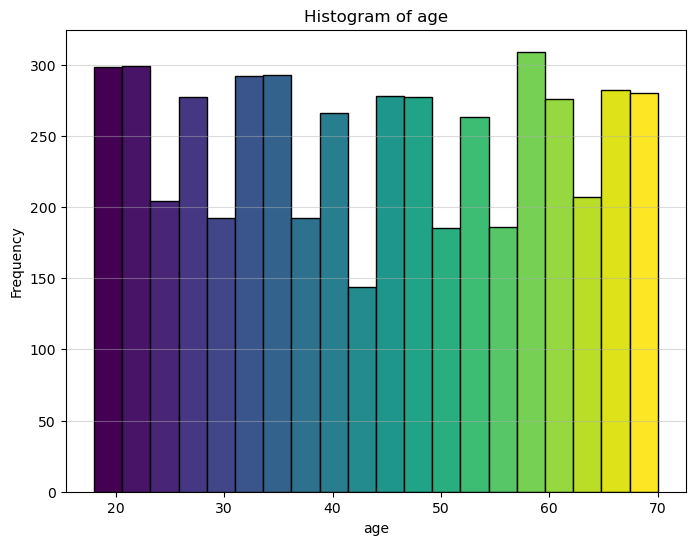

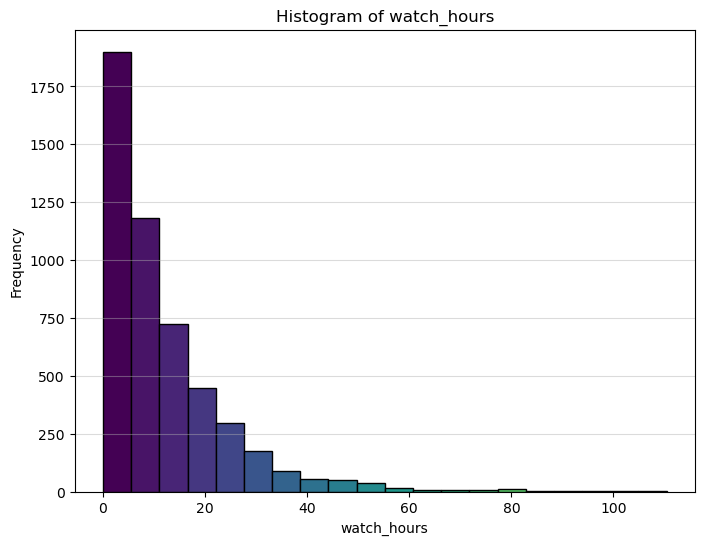

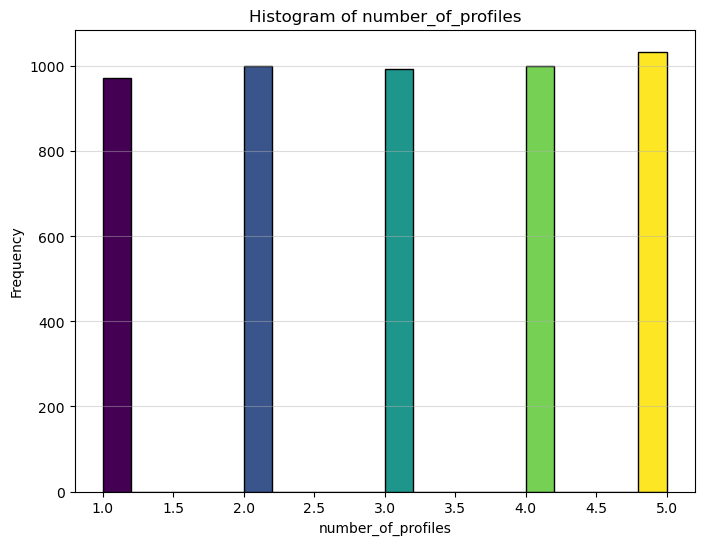

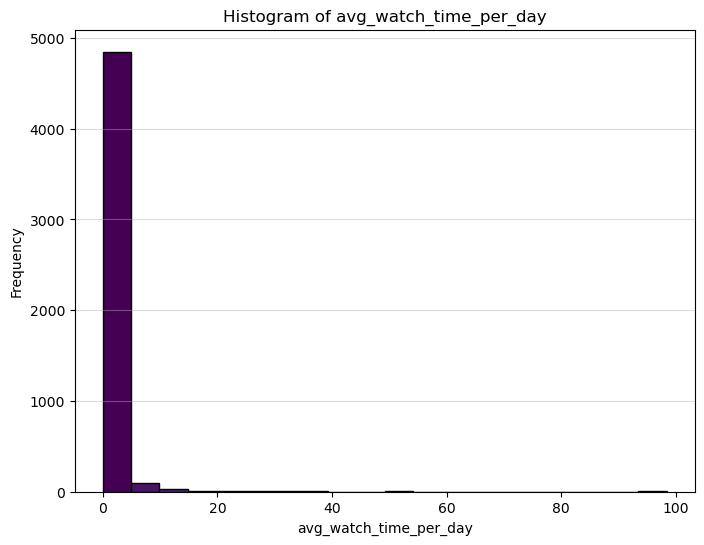

In [58]:
import matplotlib.pyplot as plot
# Plotting a histogram of a numeric column

num_columns = ['age', 'watch_hours', 'number_of_profiles','avg_watch_time_per_day']


for col in num_columns:
    plot.figure(figsize=(8,6))
    
    data = df[col].dropna()
    
    n, bins, patches = plot.hist(data, bins=20, edgecolor='black')
    cmap = plot.cm.get_cmap('viridis', len(patches))
    
    
    for i, patch in enumerate(patches):
        patch.set_facecolor(cmap(i))
    
    plot.title(f'Histogram of {col}')
    plot.xlabel(col)
    plot.ylabel('Frequency')
    plot.grid(axis='y', alpha=0.45)
    plot.show()
    